# 1.自己尝试使用pytorch实现线性回归

In [1]:
import torch
import numpy as np
print(torch.__version__)

1.4.0


## 1.1  生成数据集

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [9.99, -9.99]
true_b = 99.9
features = torch.tensor(np.random.normal(0,1,(num_examples, num_inputs)),dtype=torch.float)
labels = true_w[0]*features[:,0] +  true_w[1]*features[:,1] + true_b
labels += torch.tensor(np.random.normal(0, 0.05, size=labels.size()), dtype = torch.float)

## 1.2 数据可视化

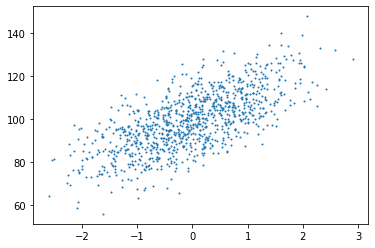

In [3]:
from matplotlib import pyplot as plt
plt.scatter(features[:, [0]].numpy(), labels.numpy(), 1)

## 1.3 读取数据

In [4]:
import torch.utils.data as Data

batch_size = 10

# 特征与标签融合
dataset = Data.TensorDataset(features, labels)

# 训练数据装载进 DataLoader
data_iter = Data.DataLoader(
    dataset = dataset,
    batch_size = batch_size,
    shuffle = True,  #打乱数据
    num_workers = 1, #多线程读数据
)

In [5]:
for X,y in data_iter:
    print(X)
    print(y)
    break;

tensor([[-0.0224, -1.0998],
        [ 0.5371,  0.4794],
        [-0.1560,  0.5094],
        [-0.4495, -0.6661],
        [ 0.6363,  1.4603],
        [ 0.0099, -0.2993],
        [-0.2959, -0.7295],
        [ 0.9361,  0.4110],
        [ 0.0672, -0.5674],
        [-0.8086, -0.4907]])
tensor([110.6581, 100.6285,  93.2110, 102.0940,  91.7609, 102.9921, 104.2340,
        105.1370, 106.1442,  96.7393])


## 1.4 定义模型

In [6]:
from torch import nn

#继承nn.Module类
class LinearNet(nn.Module):        
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(in_features = n_feature, out_features = 1)
        
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net)
    

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


### 1.4.1 定义模型写法1

In [7]:
net1 = nn.Sequential(
    nn.Linear(in_features = num_inputs, out_features = 1),
)
print(net1)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)


### 1.4.2 定义模型写法2

In [8]:
net2 = nn.Sequential()
net2.add_module('linear', nn.Linear(num_inputs, 1))
print(net2)

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


### 1.4.3 定义模型写法3

In [9]:
from collections import OrderedDict
#OrderedDict的Key会按照插入的顺序排列
net3 = nn.Sequential(
    OrderedDict([('linear', nn.Linear(num_inputs,1))])
)
print(net3)

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [10]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0130, -0.0256]], requires_grad=True)
Parameter containing:
tensor([-0.6984], requires_grad=True)


## 1.5 初始化模型参数

In [11]:
from torch.nn import init

init.normal_(net1[0].weight, mean=0.0, std=0.01)
init.constant_(net1[0].bias, val = 0.0)

for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0130, -0.0256]], requires_grad=True)
Parameter containing:
tensor([-0.6984], requires_grad=True)


## 1.6 定义损失函数

In [12]:
loss = nn.MSELoss()

## 1.7 定义优化算法

In [13]:
import torch.optim as optim

optimizer = optim.SGD(net1.parameters(), lr=0.3)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.3
    momentum: 0
    nesterov: False
    weight_decay: 0
)


### 1.7.1 测试自动梯度

# 
#test_data_iter = iter(data_iter)

X,y = next(test_data_iter)

output = net1(X)

l = loss(output,y.view(-1,1))

l.backward()

print(l)
for name, parms in net.named_parameters():
    print('-->name:', name, '-->grad_requirs:',parms.requires_grad, \
          '-->grad_value:',parms.grad)

#梯度测试 

X.requires_grad_(True)
print(X,y)


w = torch.Tensor([1,2])
w.requires_grad_(True)
b = 3
#print(w[0])

output = w[0]*X[:,[0]] + w[1]*X[:,[1]] + b
print(output)

L = output ** 2

D = L.sum()

print(L)

print(X.requires_grad)

#X.grad.data.zero_()

D.backward()

#D.zero_grad()

print(X.grad.data)

print(w.grad.data)

## 1.8 训练模型

In [14]:
num_epochs = 10
for epoch in range(1,num_epochs+1):
    for X,y in data_iter:
        output = net1(X)
        l = loss(output,y.view(-1,1))
        optimizer.zero_grad()  
        l.backward()
        optimizer.step()
    print("epoch :%d, loss: %f" % (epoch, l.item()))

epoch :1, loss: 0.001781
epoch :2, loss: 0.002559
epoch :3, loss: 0.002725
epoch :4, loss: 0.002893
epoch :5, loss: 0.001452
epoch :6, loss: 0.004687
epoch :7, loss: 0.002824
epoch :8, loss: 0.003730
epoch :9, loss: 0.001025
epoch :10, loss: 0.002884


In [15]:
dense = net1[0]
print(dense)

Linear(in_features=2, out_features=1, bias=True)


In [16]:
print(true_w, dense.weight.data)
print(true_b, dense.bias.data)

[9.99, -9.99] tensor([[ 9.9865, -9.9855]])
99.9 tensor([99.8825])
